Female summary statistics
count    1105.000000
mean       58.474736
std         9.898144
min        32.966667
25%        52.233333
50%        57.850000
75%        63.616667
max       106.816667
Name: NetTime_mins, dtype: float64
Female mode
0    48.100000
1    51.583333
2    52.983333
3    53.483333
4    59.000000
dtype: float64
Female median
57.85
Male summary statistics
count    1265.000000
mean       52.132516
std         9.687561
min        28.783333
25%        45.716667
50%        51.383333
75%        57.816667
max       100.633333
Name: NetTime_mins, dtype: float64
Male mode
0    35.466667
1    47.083333
2    47.383333
3    49.800000
4    49.966667
5    51.333333
6    52.100000
7    52.700000
8    54.400000
9    56.716667
dtype: float64
Male median
51.38333333333333


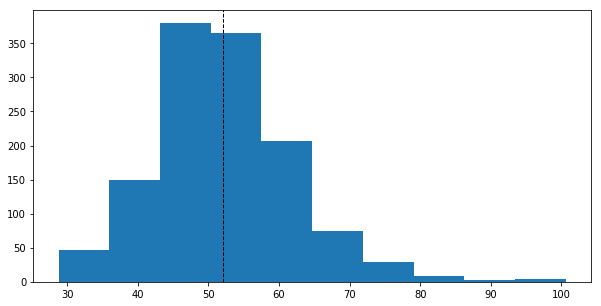

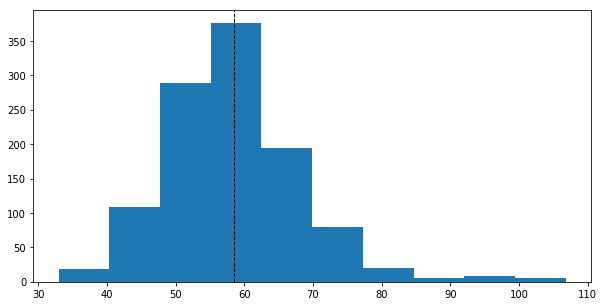

Average value of Gun - Net Times for Females
3.18552036199095
Average value of Gun - Net Times for males
2.4126482213438734


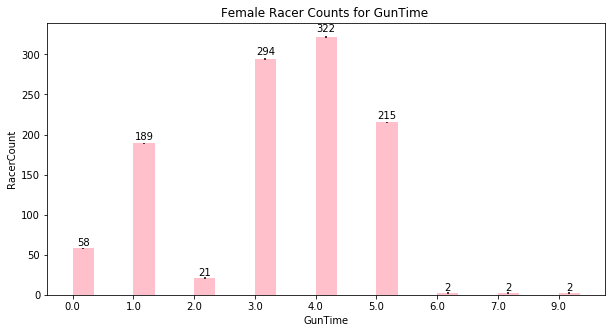

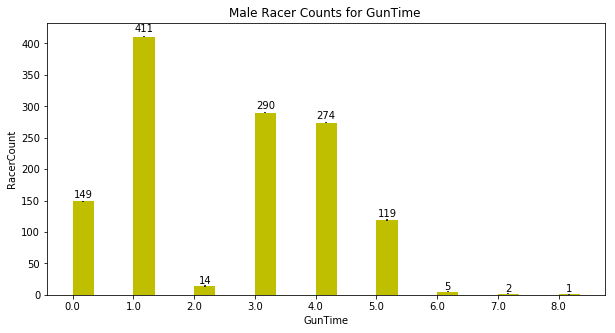

Net Time of top 10th percentile in male division
41.06666666666666
Net Time of Chris Doe in male division
   NetTime_mins
0     49.716667
Time difference between Net Time of top 10th percentile and Chris Doe's NetTime 
   NetTime_mins
0          8.65
                                      
Summary statistics for female division
                                      
           count       mean        std        min        25%        50%  \
Age_Group                                                                 
0-14        17.0  60.616667   6.723198  49.983333  57.233333  58.350000   
15-19       26.0  52.130769   9.159990  37.983333  45.041667  51.550000   
20-24       86.0  56.315504   9.633795  32.966667  50.595833  56.433333   
25-29      142.0  57.809977   8.751311  35.033333  52.066667  56.516667   
30-34      173.0  59.231503  11.119600  34.700000  52.033333  57.950000   
35-39      247.0  58.332456  10.384215  34.416667  52.433333  56.966667   
40-44      173.0  57.500096   8.

In [109]:
#------------------------------Pikes Peak racing competition----------------------------------------------------
#------------------------------Created by Anuja Vaidya[Date-07/22/2019]-----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandasql as ps

#---Read the female and male .csv files into pandas dataframes--------------------------------------------------

rawdata_f = pd.read_csv('I:/Anuja/Arizona State University/Deloitte/MA_Exer_PikesPeak_Females.txt', sep='	')
rawdata_m = pd.read_csv('I:/Anuja/Arizona State University/Deloitte/MA_Exer_PikesPeak_Males.txt',engine='python',sep="	")

#---Create Copy of raw dataframe to new a dataframe for cleaning------------------------------------------------

cldata_f = rawdata_f.copy(deep=True) 
cldata_m = rawdata_m.copy(deep=True)

#print(rawdata_f)
#print(rawdata_m)


#---Renaming the columns in the dataframe----------------------------------------------------------------------


cldata_f = cldata_f.rename(columns={'Div/Tot': 'DivTotal','Num': 'BibNumber', 'Ag': 'Age','Gun Tim':'GunTime','Net Tim':'NetTime'})
cldata_m = cldata_m.rename(columns={'Div/Tot': 'DivTotal','Num': 'BibNumber', 'Ag': 'Age','Gun Tim':'GunTime','Net Tim':'NetTime'})

#---Cleaning columns GunTime and NetTime which have extraneous characters like '*#DAVMN '----------------------

cols = ['GunTime', 'NetTime']
for col in cols:
    cldata_f[col] = cldata_f[col].map(lambda x: str(x).lstrip('*#DAVMN ').rstrip('*#DAVMN '))
    cldata_m[col] = cldata_m[col].map(lambda x: str(x).lstrip('*#DAVMN ').rstrip('*#DAVMN '))

#---Define a function to convert GunTime and NetTime to time in minutes----------------------------------------
def newdecimalTime(new_Time):
    newTime =[]
    for x in new_Time:
        if len(x)==3:
            m = int(x[0])*60 + int(x[1]) + (int(x[2])/60)
            newTime.append(m)
        elif len(x)==2:
            n = int(x[0])+int(x[1])/60
            newTime.append(n)
    return   newTime    

#---Calling the function and converting GunTime_mins and NetTime_mins in minutes--------------------------------

#---Adding the results to new columns---------------------------------------------------------------------------

cldata_m['GunTime_mins'] = list(np.array(newdecimalTime(cldata_m['GunTime'].str.split(':'))))
cldata_m['NetTime_mins'] = list(np.array(newdecimalTime(cldata_m['NetTime'].str.split(':'))))
cldata_m['Gun-Net_Time'] = list(np.around(cldata_m['GunTime_mins']-cldata_m['NetTime_mins']))
cldata_f['GunTime_mins'] = list(np.array(newdecimalTime(cldata_f['GunTime'].str.split(':'))))
cldata_f['NetTime_mins'] = list(np.array(newdecimalTime(cldata_f['NetTime'].str.split(':'))))
cldata_f['Gun-Net_Time'] = list(np.around(cldata_f['GunTime_mins']-cldata_f['NetTime_mins']))

#----------------------------Exporting data to excel------------------------------------------------------------

#cldata_f.to_excel(r'I:\Anuja\export_female.xlsx', index = None, header=True)
#cldata_m.to_excel(r'I:\Anuja\export_male.xlsx', index = None, header=True)

#----------------------------Check the dataframe for null values if any-----------------------------------------

pd.isnull(cldata_m)
pd.isnull(cldata_f)

#---------------------------------------------------------------------------------------------------------------

#---Q1) What are the mean, median, mode, and range of the race results for all racers bygender?-----------------

#---Calculating summary statistics unsing describe and mode and median inbuilt functions------------------------

print("Female summary statistics")
print(cldata_f['NetTime_mins'].describe())
print("Female mode")
print(cldata_f['NetTime_mins'].mode())
print("Female median")
print(cldata_f['NetTime_mins'].median())
print("Male summary statistics")
print(cldata_m['NetTime_mins'].describe())
print("Male mode")
print(cldata_m['NetTime_mins'].mode())
print("Male median")
print(cldata_m['NetTime_mins'].median())

#----------------------------------------------------------------------------------------------------------------
#---Q2) Analyze the difference between gun and nettime race results.---------------------------------------------

#Histogram of Male Nettime distribution
plt.hist(cldata_m['NetTime_mins'])
plt.axvline(cldata_m['NetTime_mins'].mean(), color='k', linestyle='dashed', linewidth=1)
_, max_ = plt.ylim()
plt.rcParams["figure.figsize"] = [10,5]
plt.show()
#Histogram of Female Nettime distribution
plt.hist(cldata_f['NetTime_mins'])
plt.axvline(cldata_f['NetTime_mins'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

#---Average Gun- Net Times for Females--------------------------------------------------------------------------

print("Average value of Gun - Net Times for Females")
print(cldata_f['Gun-Net_Time'].mean())
print("Average value of Gun - Net Times for males")
print(cldata_m['Gun-Net_Time'].mean())

#---Bar chart to analyze  Gun time and Racecount----------------------------------------------------------------
#---Female------------------------------------------------------------------------------------------------------
ax1 = cldata_f[['BibNumber','Gun-Net_Time']].groupby(['Gun-Net_Time']).count()
y=ax1['BibNumber'].tolist()
x= sorted(cldata_f['Gun-Net_Time'].unique().tolist() )

fig, ax = plt.subplots()

ind = np.arange(len(x))  # the x locations for the groups
width = 0.35 
rects1 = ax.bar(ind + width, y, width, color='pink', yerr=1)
# add some text for labels, title and axes ticks

ax.set_ylabel('RacerCount')
ax.set_xlabel('GunTime')
ax.set_title('Female Racer Counts for GunTime ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

#---Function to display the datavalues labels for each column----------------------------------------------------

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
        
autolabel(rects1)
plt.show()

#----------------------------------------------------------------------------------------------------------------

#---Bar chart to analyze  Gun time and Racecount-----------------------------------------------------------------
#---Male---------------------------------------------------------------------------------------------------------


ax1 = cldata_m[['BibNumber','Gun-Net_Time']].groupby(['Gun-Net_Time']).count()
y=ax1['BibNumber'].tolist()
x= sorted(cldata_m['Gun-Net_Time'].unique().tolist() )

fig, ax = plt.subplots()

ind = np.arange(len(x))  # the x locations for the groups
width = 0.35 
rects2 = ax.bar(ind + width, y, width, color='y', yerr=1)
# add some text for labels, title and axes ticks

ax.set_ylabel('RacerCount')
ax.set_xlabel('GunTime')
ax.set_title('Male Racer Counts for GunTime ')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x)

#---Function to display the datavalues labels for each column----------------------------------------------------

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,'%d' % int(height),ha='center', va='bottom')
        
autolabel(rects2)
plt.show()

#----------------------------------------------------------------------------------------------------------------

#---Q3) How much time separates Chris Doe from the top 10 percentile of racers of the same division?-------------

Qry_NetTime = """select NetTime_mins from cldata_m where Name = 'Chris Doe'"""
print("Net Time of top 10th percentile in male division")
print(cldata_m['NetTime_mins'].quantile(0.1))
print("Net Time of Chris Doe in male division")
print(ps.sqldf(Qry_NetTime,locals()))
print("Time difference between Net Time of top 10th percentile and Chris Doe's NetTime ")
Time_Diff = ps.sqldf(Qry_NetTime,locals()) - cldata_m['NetTime_mins'].quantile(0.1)
print(Time_Diff)

#----------------------------------------------------------------------------------------------------------------

#-------------------------Q4) Compare the race results of each division.-----------------------------------------

#--------------------Function to categorize the racers based on agegroups----------------------------------------

def agegroup(i):
        if i >= -1 and i <= 14 :
            return  "0-14"
        elif i >= 15 and i <= 19 :
            return  "15-19"
        elif i >=20 and i <= 24:
            return  "20-24"
        elif i >=25 and i <= 29:
            return  "25-29"
        elif i >=30 and i <= 34:
            return  "30-34"
        elif i >=35 and i <= 39:
            return  "35-39"
        elif i >=40 and i <= 44:
            return  "40-44"
        elif i >=45 and i <= 49:
            return  "45-49"
        elif i >=50 and i <= 54:
            return  "50-54"
        elif i >=55 and i <= 59:
            return  "55-59"
        elif i >=60 and i <= 64:
            return  "60-64"
        elif i >=65 and i <= 69:
            return  "65-69"
        elif i >=70 and i <= 74:
            return  "70-74"
        elif i >=75 and i <= 79:
            return  "75-79"
        elif i >=80 and i <= 84:
            return  "80-84"
        elif i >=85 and i <= 89:
            return  "85-89"
        else :
            return "Invalid"

print("                                      ")
print("Summary statistics for female division")
print("                                      ")

cldata_f['Age'] = cldata_f['Age'].fillna(0)
cldata_f['Age'] = cldata_f.Age.astype(int)      
cldata_f['Age_Group'] = cldata_f.apply(lambda x: agegroup(x['Age']), axis=1)        

#---Female Descriptive statistics----------------------------------------------------------------------------

print(cldata_f.groupby('Age_Group')['NetTime_mins'].describe())

print("                                      ")
print("Summary statistics for male division")
print("                                      ")

cldata_m['Age'] = cldata_m['Age'].fillna(0)
cldata_m['Age'] = cldata_m.Age.astype(int)      
cldata_m['Age_Group'] = cldata_m.apply(lambda x: agegroup(x['Age']), axis=1)   

#---Male Descriptive statistics-------------------------------------------------------------------------------

print(cldata_m.groupby('Age_Group')['NetTime_mins'].describe())